In [1]:
import json
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

In [7]:
#load data
review_df = pd.read_pickle('review_df.pkl')

In [4]:
business_tokeep = pd.read_pickle('business_tokeep.pkl')
business_pan_eligible = pd.read_pickle('business_pan_eligible.pkl').reset_index()
business_pan_eligible['duration_toUse'] = business_pan_eligible['duration_toUse'].dt.days.astype('int16')/365

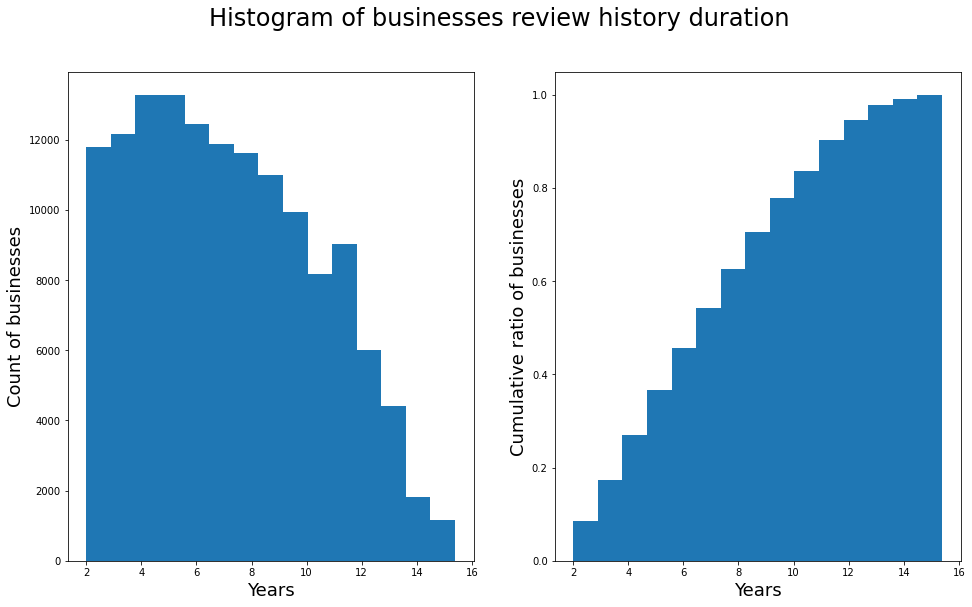

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2) 
fig.suptitle('Histogram of businesses review history duration', fontsize = 24)
ax1.hist(business_pan_eligible['duration_toUse'], bins=15)
ax1.set_xlabel('Years', fontsize = 18)
ax1.set_ylabel('Count of businesses', fontsize = 18)
#ax1.title('Histogram of businesses review history')

ax2.hist(business_pan_eligible['duration_toUse'], bins=15, density=True, cumulative=True)
ax2.set_xlabel('Years', fontsize = 18)
ax2.set_ylabel('Cumulative ratio of businesses', fontsize = 18)
#ax2.title('Histogram of businesses review history')
plt.show()

In [4]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [9]:
selected_review = review_df[(review_df["business_id"].isin(business_pan_eligible['business_id'])) & 
                           (review_df['date'] < '2020-03-01')]

In [10]:
len(selected_review)

7696848

In [11]:
# filtered reviews count after group by business
review_count = selected_review.groupby('business_id').count()
# review count for each business follow powerlaw

In [12]:
len(review_count)

138023

In [13]:
# just for fun, fit it with power law
import powerlaw

In [14]:
count = review_count.review_id
fitted = powerlaw.Fit(count)
fitted.xmin

Calculating best minimal value for power law fit
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


424.0

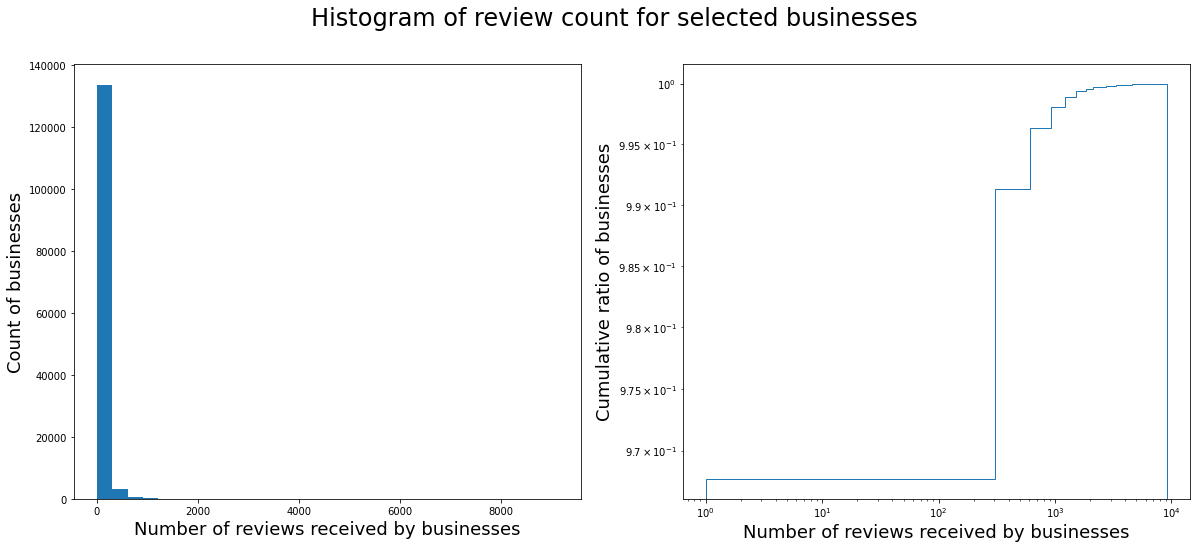

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 8]) 
fig.suptitle('Histogram of review count for selected businesses', fontsize = 24)
ax1.hist(review_count['review_id'], bins=30)
ax1.set_xlabel('Number of reviews received by businesses', fontsize = 18)
ax1.set_ylabel('Count of businesses', fontsize = 18)

ax2.hist(review_count['review_id'], bins=30, density=True, histtype='step', cumulative=True)
ax2.set_xlabel('Number of reviews received by businesses', fontsize = 18)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('Cumulative ratio of businesses', fontsize = 18)

plt.show()

In [ ]:
# need to further filter businesses - take businesses with top 10% review counts
# this will still give us ~13000 businesses to analyze

In [16]:
further_filtered_business = review_count[review_count['review_id'] >= 
                                         review_count['review_id'].quantile(0.9)].reset_index()

In [17]:
further_filtered_business.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,--164t1nclzzmca7eDiJMw,147,147,147,147,147,147,147,147
1,--UNNdnHRhsyFUbDgumdtQ,1251,1251,1251,1251,1251,1251,1251,1251
2,--hkbIWgBKBOZq4VcNwdhQ,424,424,424,424,424,424,424,424
3,-0A60UZl9nbdq2WWySJ_tQ,285,285,285,285,285,285,285,285
4,-0iqnv7MjKrgh7Q7bYRlUQ,440,440,440,440,440,440,440,440


In [18]:
further_filtered_business.to_pickle('preprocessed_business.pkl')

In [153]:
further_filtered_reviews = selected_review[selected_review["business_id"].isin(
    further_filtered_business['business_id'])]

In [113]:
len(further_filtered_reviews)

4438241

In [114]:
# save the further_filtered_review into pickle
further_filtered_reviews.to_pickle('preprocessed_review.pkl')

In [2]:
further_filtered_reviews = pd.read_pickle('preprocessed_review.pkl')

In [19]:
final_duration = business_pan_eligible[business_pan_eligible['business_id'].isin(
    further_filtered_business['business_id'])]

In [20]:
final_duration.head()

,business_id,new_date_old,new_date_new,duration,pan_duration,duration_toUse
2,--164t1nclzzmca7eDiJMw,2009-03-17 01:53:31,2014-06-09 21:27:05,1910 days 19:33:34,4001 days 22:06:29,5.232877
13,--UNNdnHRhsyFUbDgumdtQ,2006-09-13 19:29:54,2020-12-17 17:35:28,5208 days 22:05:34,4917 days 04:30:06,13.471233
19,--hkbIWgBKBOZq4VcNwdhQ,2014-05-30 00:40:40,2021-01-15 02:00:48,2422 days 01:20:08,2101 days 23:19:20,5.756164
38,-0A60UZl9nbdq2WWySJ_tQ,2007-01-28 19:00:15,2019-10-23 21:56:53,4651 days 02:56:38,4780 days 04:59:45,12.742466
63,-0iqnv7MjKrgh7Q7bYRlUQ,2011-01-30 01:57:51,2020-12-16 03:19:09,3608 days 01:21:18,3317 days 22:02:09,9.087671


In [22]:
review_count_new = further_filtered_reviews.groupby('business_id').count()

In [23]:
len(review_count_new)

13814

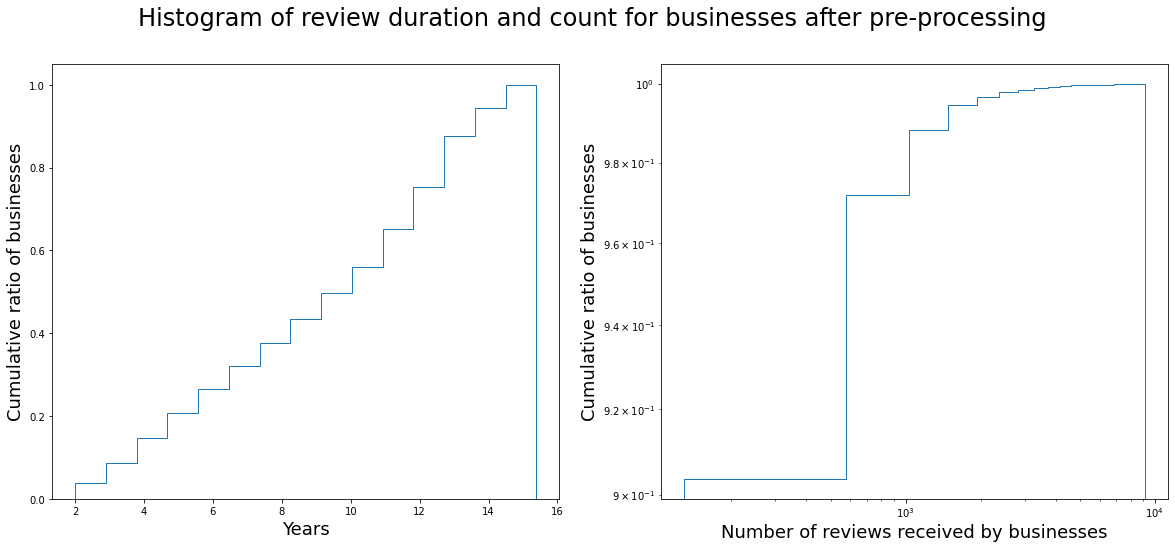

In [27]:
# now plot the distribution of review history by businesses
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 8]) 
fig.suptitle('Histogram of review duration and count for businesses after pre-processing', fontsize = 24)
ax1.hist(final_duration['duration_toUse'], bins=15, density=True, cumulative=True, histtype='step')
ax1.set_xlabel('Years', fontsize = 18)
ax1.set_ylabel('Cumulative ratio of businesses', fontsize = 18)
#ax1.title('duration of review history')

ax2.hist(review_count_new['review_id'], bins=20, density=True, cumulative=True, histtype='step')
ax2.set_xlabel('Number of reviews received by businesses', fontsize = 18)
ax2.set_ylabel('Cumulative ratio of businesses', fontsize = 18)
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.title('total review count')
plt.show()

In [44]:
# function to categorize
def assign_category(lists_of_strings):
    for i in lists_of_strings:
        if("Active Life" in i):
            output = "Active Life"
        elif("Arts & Entertainment" in i):
            output = "Arts & Entertainment"
        elif("Automotive" in i):
            output = "Automotive"
        elif("Beauty & Spas" in i):
            output = "Beauty & Spas"
        elif("education" in i):
            output = "Education"
        elif("Event Planning & Services" in i):
            output = "Event Planning & Services"
        elif("Financial Services" in i):
            output = "Financial Services"
        elif("Food" in i):
            output = "Food"
        elif("Health & Medical" in i):
            output = "Health & Medical"
        elif("Home Services" in i):
            output = "Home Services"
        elif("Hotels & Travel" in i):
            output = "Hotels & Travel"
        elif("Local Flavor" in i):
            output = "Local Flavor"
        elif("Local Services" in i):
            output = "Local Services"
        elif("Mass Media" in i):
            output = "Mass Media"
        elif("Nightlife" in i):
            output = "Nightlife"
        elif("Pets" in i):
            output = "Pets"
        elif("Professional Services" in i):
            output = "Professional Services"
        elif("Public Services & Government" in i):
            output = "Public Services & Government"
        elif("Real Estate" in i):
            output = "Real Estate"
        elif("Religious Organizations" in i):
            output = "Religious Organizations"
        elif("Restaurants" in i):
            output = "Restaurants"
        elif("Shopping" in i):
            output = "Shopping"
    return output

In [35]:
# Load business.json and filter out the 13000 we need
path = '/Users/ncr5341/Documents/Coursework/DataPipeline/yelp_dataset/'
business_df = pd.read_json(path+'yelp_academic_dataset_business.json', lines=True)


In [51]:
subset_business = business_df[business_df['business_id'].isin(further_filtered_business['business_id'])]

In [52]:
subset_business = subset_business.assign(
    main_category = assign_category(subset_business['categories']))

In [53]:
subset_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,main_category
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",Restaurants
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",Restaurants
23,j68RDnvOaYEwGcY9cTEHpA,Pittock Mansion,3229 NW Pittock Dr,Portland,OR,97210,45.525259,-122.716227,4.5,406,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Tours, Museums, Architectural Tours, Venues & ...","{'Monday': '0:0-0:0', 'Thursday': '10:0-16:0',...",Restaurants
24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,30.326377,-97.704543,3.0,139,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Restaurants
28,arEXRZYu8220bFBJ3VAh3A,Blake's On The Park,227 10th St NE,Atlanta,GA,30309,33.781475,-84.379955,3.5,170,1,"{'Alcohol': ''full_bar'', 'BusinessParking': '...","Nightlife, Bars, Gay Bars, Sports Bars","{'Monday': '15:0-3:0', 'Tuesday': '15:0-3:0', ...",Restaurants


In [56]:
type_count = subset_business['main_category'].value_counts()

In [57]:
type_count

Restaurants    13814
Name: main_category, dtype: int64

In [28]:
# test business_id
test_set = {'buF9druCkbuXLX526sGELQ', 'RA4V8pr014UyUbDvI-LW2A'}
test_reviews = selected_review[selected_review["business_id"].isin(test_set)]

In [29]:
test_reviews.sort_values(by=['business_id','date']).set_index('business_id')

,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,
RA4V8pr014UyUbDvI-LW2A,5wIrh0JHiHqeBwgm7K1FCQ,iCppbv3C7XvCyzIZnNQ7fg,3.0,0,0,0,Keep an eye on the register! The price may no...,2008-12-30 13:27:20
RA4V8pr014UyUbDvI-LW2A,7XWbVm1RHBAio_9FmNRc_w,HnA4k2WObb00F4tW1MOhdg,3.0,1,1,0,I just got back from shopping for a baby showe...,2009-04-01 02:41:15
RA4V8pr014UyUbDvI-LW2A,8N9_tCjmoJkdTRD-R3xEpw,weEns7WVtPAgrHuxYpvwOg,4.0,1,0,0,Searching for a new pair of glasses can be a p...,2009-08-18 00:56:47
RA4V8pr014UyUbDvI-LW2A,oGqW0iZs7nHfNmbxJ0g16w,DTerWbIMkBafUJAKI1gaPw,2.0,0,0,0,"I enjoy shopping at this Target, but I recentl...",2009-11-15 02:03:58
RA4V8pr014UyUbDvI-LW2A,frjVnWxasp0JzXqIIFV-tg,wXhM5a0NTk6Z82bQrg40cw,4.0,4,2,2,"I have to say, I LOVE target. You can find eve...",2009-12-31 21:45:37
...,...,...,...,...,...,...,...,...
buF9druCkbuXLX526sGELQ,hZGwXXS3Z7s06vaVYrHIsg,cp_mCXj5NIVyQCr50qDKVw,1.0,3,1,3,If you've been looking for the restaurant wher...,2014-11-26 12:59:18
buF9druCkbuXLX526sGELQ,hpcZLEzqD4_gPi6eSVi_Bg,Y-j2svl0M_5-jF1ehYuNPQ,2.0,1,1,1,I was really disappointed to say the least. I ...,2014-11-30 00:24:42
buF9druCkbuXLX526sGELQ,LwJ94zq2s7gEmEQZQLr6Tg,u1Y6J-Ef4Skn8sJ1TpAoaw,1.0,5,2,0,NOW CLOSED. Or so it certainly appears so cal...,2015-01-22 19:46:17


In [83]:
test_reviews.groupby('business_id').count()

,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,
RA4V8pr014UyUbDvI-LW2A,67,67,67,67,67,67,67,67
buF9druCkbuXLX526sGELQ,84,84,84,84,84,84,84,84
